In [2]:
####### Importing Libraries #######
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
##### Importing Dataset ######
df = pd.read_csv('sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


We will be focusing on the text data for building our Word2Vec Model

In [4]:
##### Preprocessing Text ######

def preprocess_text(text):
    '''
    1. Converting text into lowercase
    2. Removing special character from our text
    3. Tokenizing our text using the word_tokenize function
    4. Adding lemmatization over words
    '''
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    stop_word = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [words for words in tokens if words not in stop_word]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

df['processed_data'] = df['Text'].apply(preprocess_text)
df[['processed_data','Text']].head(10)

,processed_data,Text
0,"[enjoying, beautiful, day, park]",Enjoying a beautiful day at the park! ...
1,"[traffic, terrible, morning]",Traffic was terrible this morning. ...
2,"[finished, amazing, workout]",Just finished an amazing workout! 💪 ...
3,"[excited, upcoming, weekend, getaway]",Excited about the upcoming weekend getaway! ...
4,"[trying, new, recipe, dinner, tonight]",Trying out a new recipe for dinner tonight. ...
5,"[feeling, grateful, little, thing, life]",Feeling grateful for the little things in lif...
6,"[rainy, day, call, cozy, blanket, hot, cocoa]",Rainy days call for cozy blankets and hot coc...
7,"[new, movie, release, mustwatch]",The new movie release is a must-watch! ...
8,"[political, discussion, heating, timeline]",Political discussions heating up on the timel...
9,"[missing, summer, vibe, beach, day]",Missing summer vibes and beach days. ...


In [5]:
#### Converting dataframe into list ######
sentences = df['processed_data'].tolist()

### Train word2vec model ####
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size = 100,
    window = 5,
    sg = 1,
    min_count = 2,
    workers = 4
)

### Saving the model ####
w2v_model.save("sentiment_word2vec.model")

### Building the vocabulary ### 
w2v_model.build_vocab(sentences)

# Train the Word2Vec model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10)

(43772, 59140)

In [6]:
### Testing the model to find the similarity between words ###

similar_words = w2v_model.wv.most_similar('laughter')
similar_words

[('joy', 0.9986089468002319),
 ('event', 0.998524010181427),
 ('dream', 0.9984615445137024),
 ('time', 0.9984114170074463),
 ('cup', 0.9983567595481873),
 ('creating', 0.9983416795730591),
 ('concert', 0.9983394145965576),
 ('friend', 0.9983052611351013),
 ('past', 0.9983000755310059),
 ('moment', 0.9982736706733704)]

In [7]:
### Applying PCA to reduce the dimensionality of the word vectors ###

word_vectors = w2v_model.wv.vectors
pca = PCA(n_components=2)
reduced_vector = pca.fit_transform(word_vectors)

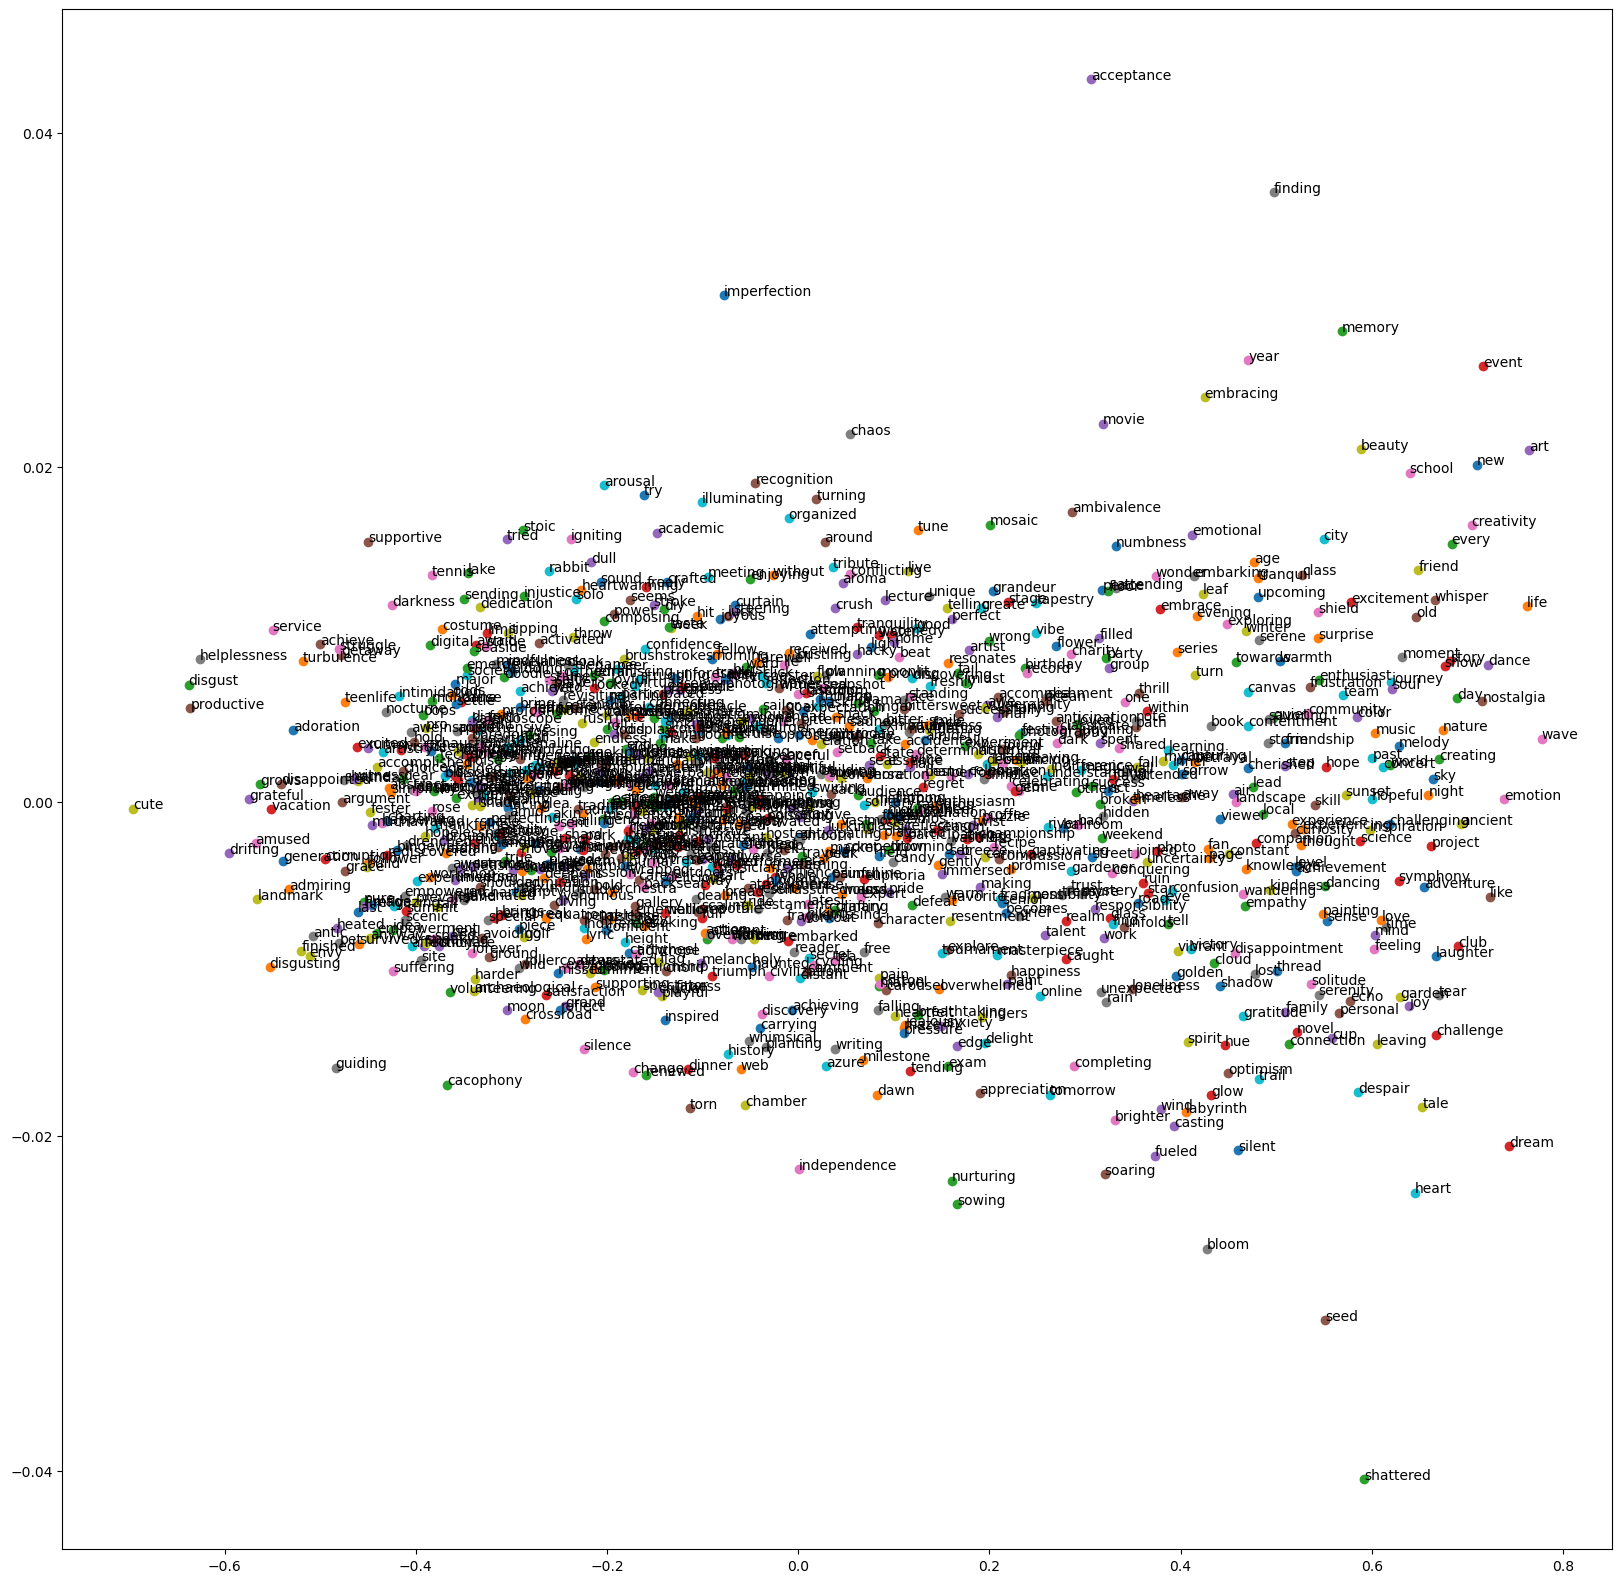

In [8]:
### Visulazing the word embeddings ###

plt.figure(figsize=(20,20))
words = list(w2v_model.wv.index_to_key)

for i, word in enumerate(words):
    plt.scatter(reduced_vector[i,0], reduced_vector[i,1])
    plt.annotate(word, (reduced_vector[i,0], reduced_vector[i,1]))
    
plt.show()